<h1 style="color:blue" align="center"><b> Market Segmentation in SBI life Insurance</b> </h1>

# **1. Overview**

### **Objective :**
This case requires to develop a customer segmentation to give recommendations like saving plans, loans, wealth management, etc. on target customer groups. 
### **Description :**
The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.
### **Data :**  
Use the below link to download the Data Set:[here](https://www.kaggle.com/datasets/abhashkumarjha/market-segmentation-in-sbi-life-insurance)

### **Attribute :**
Following is the Data Dictionary for customer's credit card dataset :-

<b>CUSTID :</b> Identification of Credit Card holder (Categorical)<br>
<b>BALANCE :</b> Balance amount left in their account to make purchases<br>
<b>BALANCEFREQUENCY :</b> How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)<br>
<b>PURCHASES :</b> Amount of purchases made from account<br>
<b>ONEOFFPURCHASES :</b> Maximum purchase amount done in one-go<br>
<b>INSTALLMENTSPURCHASES :</b> Amount of purchase done in installment<br>
<b>CASHADVANCE :</b> Cash in advance given by the user<br>
<b>PURCHASESFREQUENCY :</b> How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)<br>
<b>ONEOFFPURCHASESFREQUENCY :</b> How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)<br>
PURCHASESINSTALLMENTSFREQUENCY :</b> How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)<br>
<b>CASHADVANCEFREQUENCY :</b> How frequently the cash in advance being paid<br>
<b>CASHADVANCETRX :</b> Number of Transactions made with "Cash in Advanced"<br>
<b>PURCHASESTRX :</b> Numbe of purchase transactions made<br>
<b>CREDITLIMIT :</b> Limit of Credit Card for user<br>
<b>PAYMENTS :</b> Amount of Payment done by user<br>
<b>MINIMUM_PAYMENTS :</b> Minimum amount of payments made by user<br>
<b>PRCFULLPAYMENT :</b> Percent of full payment paid by user<br>
<b>TENURE :</b> Tenure of credit card service for user<br>


# **2. Import Libraries:**

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

# **3. Load Dataset:**

In [3]:
# import the dataset

credit_df = pd.read_csv("credit-card_data.csv")
credit_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# **4.Exploratory Data Analysis & Data Cleaning:**

In [4]:
credit_df.shape

(8950, 18)

In [5]:
# information about the data

credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
# Check the statistics summary of the dataframe

credit_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
# checking for Null values in data frame

credit_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
# find all columns having missing values

missing_var = [var for var in credit_df.columns if credit_df[var].isnull().sum()>0]
missing_var

['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

In [9]:
# fill mean value in place of missing values

credit_df["MINIMUM_PAYMENTS"] = credit_df["MINIMUM_PAYMENTS"].fillna(credit_df["MINIMUM_PAYMENTS"].mean())
credit_df["CREDIT_LIMIT"] = credit_df["CREDIT_LIMIT"].fillna(credit_df["CREDIT_LIMIT"].mean())

In [10]:
# Again check for null values

credit_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
# check duplicate entries in the dataset

credit_df.duplicated().sum()

0

In [12]:
# drop unnecessary columns

credit_df.drop(columns=["CUST_ID"],axis=1,inplace=True)

In [13]:
credit_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [14]:
credit_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# **5. Outlier Detection**

In [15]:
# find outlier in all columns

for i in credit_df.select_dtypes(include=['float64','int64']).columns:
  max_thresold = credit_df[i].quantile(0.96)
  min_thresold = credit_df[i].quantile(0.07)
  credit_df_no_outlier = credit_df[(credit_df[i] < max_thresold) & (credit_df[i] > min_thresold)].shape
  print(" outlier in ",i,"is" ,int(((credit_df.shape[0]-credit_df_no_outlier[0])/credit_df.shape[0])*100),"%")

 outlier in  BALANCE is 11 %
 outlier in  BALANCE_FREQUENCY is 77 %
 outlier in  PURCHASES is 26 %
 outlier in  ONEOFF_PURCHASES is 52 %
 outlier in  INSTALLMENTS_PURCHASES is 47 %
 outlier in  CASH_ADVANCE is 55 %
 outlier in  PURCHASES_FREQUENCY is 47 %
 outlier in  ONEOFF_PURCHASES_FREQUENCY is 53 %
 outlier in  PURCHASES_INSTALLMENTS_FREQUENCY is 58 %
 outlier in  CASH_ADVANCE_FREQUENCY is 55 %
 outlier in  CASH_ADVANCE_TRX is 55 %
 outlier in  PURCHASES_TRX is 26 %
 outlier in  CREDIT_LIMIT is 13 %
 outlier in  PAYMENTS is 11 %
 outlier in  MINIMUM_PAYMENTS is 11 %
 outlier in  PRC_FULL_PAYMENT is 71 %
 outlier in  TENURE is 93 %


In [16]:
# remove outliers from columns having nearly 10% outlier

max_thresold_BALANCE = credit_df["BALANCE"].quantile(0.96)
min_thresold_BALANCE = credit_df["BALANCE"].quantile(0.07)
max_thresold_CREDIT_LIMIT = credit_df["CREDIT_LIMIT"].quantile(0.96)
min_thresold_CREDIT_LIMIT = credit_df["CREDIT_LIMIT"].quantile(0.07)
max_thresold_PAYMENTS = credit_df["PAYMENTS"].quantile(0.96)
min_thresold_PAYMENTS = credit_df["PAYMENTS"].quantile(0.07)
credit_df_no_outlier = credit_df[(credit_df["CREDIT_LIMIT"] < max_thresold_CREDIT_LIMIT) & (credit_df["CREDIT_LIMIT"] > min_thresold_CREDIT_LIMIT) & (credit_df["BALANCE"] < max_thresold_BALANCE) & (credit_df["BALANCE"] > min_thresold_BALANCE) &  (credit_df["PAYMENTS"] < max_thresold_PAYMENTS) & (credit_df["PAYMENTS"] > min_thresold_PAYMENTS)]


In [17]:
# DataFrame having no outlier

credit_df_no_outlier.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.00,0,12,2300.0,679.065082,532.033990,0.000000,12


In [18]:
credit_df_no_outlier.shape

(6440, 17)

<Axes: >

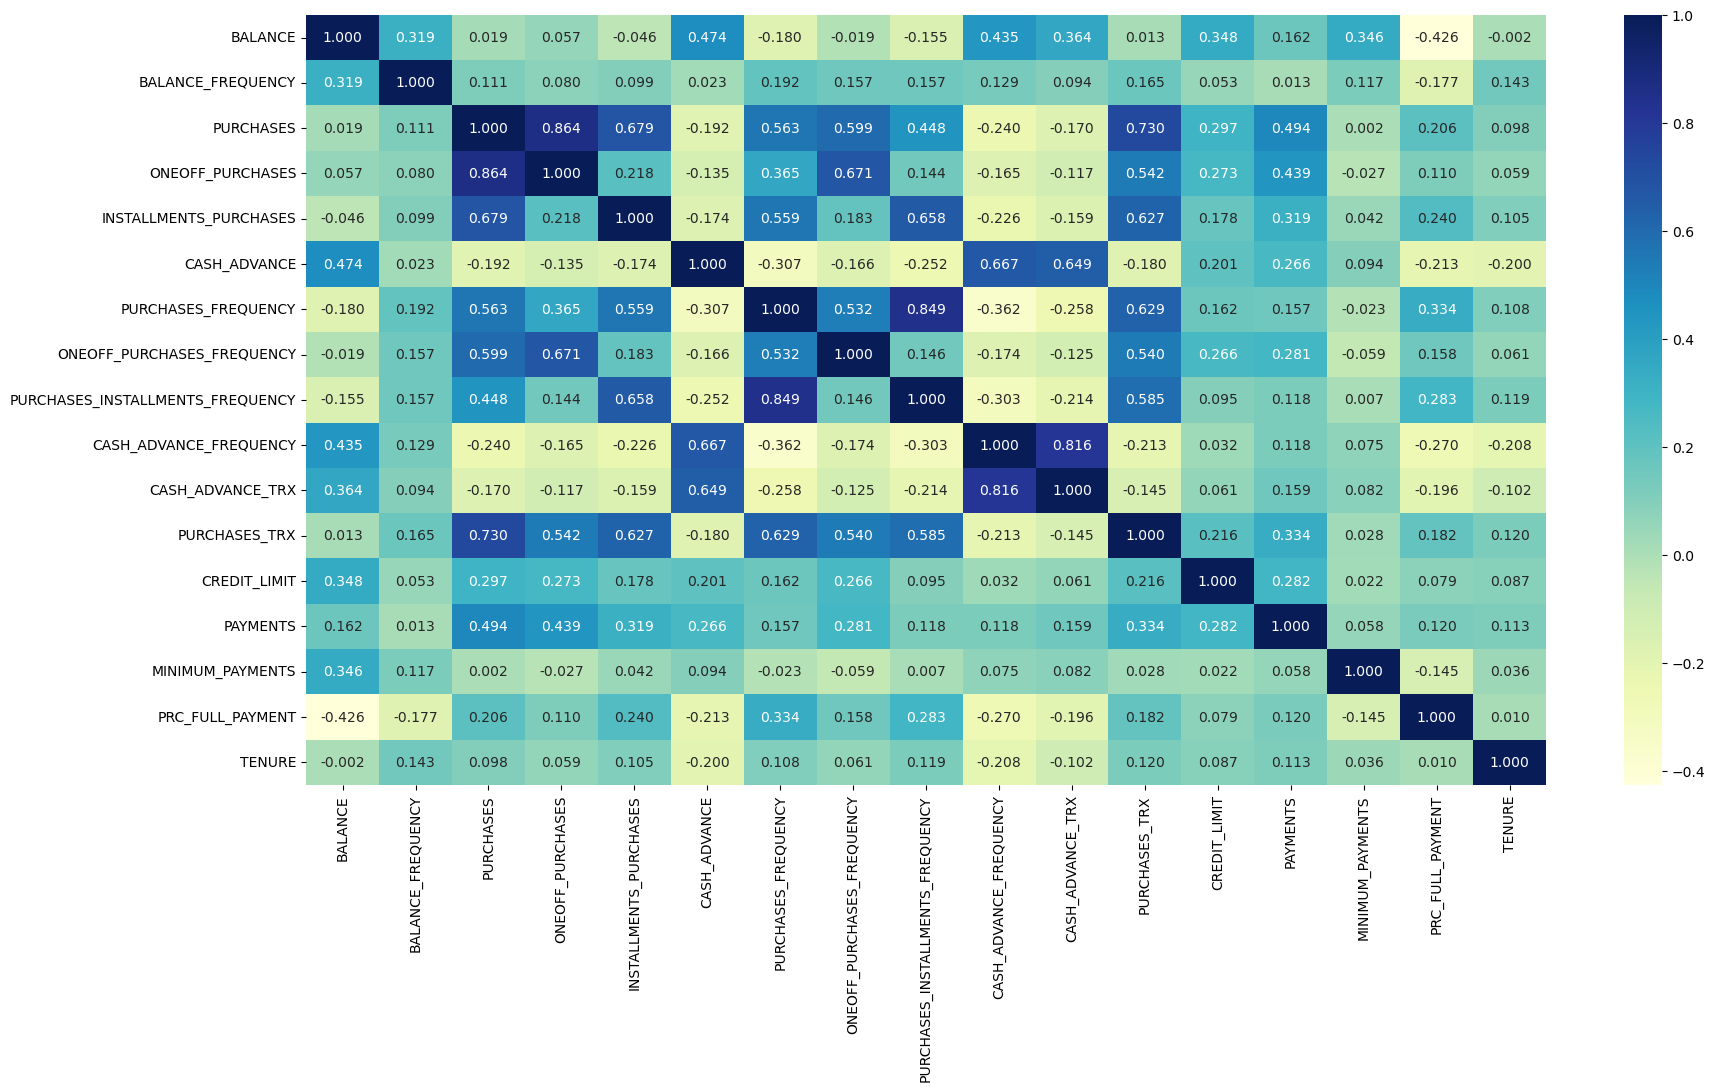

In [19]:
# correlation matrix of DataFrame

plt.figure(figsize=(20,10))
corn=credit_df_no_outlier.corr()
sns.heatmap(corn,annot=True,cmap="YlGnBu",fmt='.3f')

## From the results, we can see 3 pairs of strong correlation
1. "PURCHASES" and "ONEOFF_PURCHASES" -- 0.86
2. "PURCHASES_FREQUENCY" and 'PURCHASES_INSTALLMENT_FREQUENCY' --0.85
3. "CASH_ADVANCE_TRX" and "CASH_ADVANCE_FREQUENCY" --0.81

# **6. Scaling the data**

The next step is to scale our values to give them all equal importance. Scaling is also important from a clustering perspective as the distance between points affects the way clusters are formed.

Using the StandardScaler, we transform our dataframe into the following numpy arrays

In [20]:
# scale the DataFrame

scalar=StandardScaler()
credit_scaled_df = scalar.fit_transform(credit_df_no_outlier)

In [21]:
credit_scaled_df

array([[ 1.2016738 , -0.0811209 , -0.70652056, ...,  0.17251609,
         0.26130654,  0.33071652],
       [ 0.71752805,  0.46131662, -0.09369876, ..., -0.06450292,
        -0.5126037 ,  0.33071652],
       [-0.43064316,  0.46131662, -0.69383881, ..., -0.26820394,
        -0.5126037 ,  0.33071652],
       ...,
       [-0.9764846 , -0.53315514, -0.61893722, ..., -0.3634548 ,
         1.22869609, -4.7442979 ],
       [-0.93640301, -2.5220927 , -0.70652056, ..., -0.38694901,
         0.64826167, -4.7442979 ],
       [ 3.09426774, -0.53315514, -0.53646621, ...,  0.06047049,
        -0.5126037 , -4.7442979 ]])

# **7. Dimensionality reduction**

-> Dimensionality reduction is a technique used to reduce the number of features in a dataset while retaining as much of the important information as possible. 

-> In other words, it is a process of transforming high-dimensional data into a lower-dimensional space that still preserves the essence of the original data.

-> This can be done for a variety of reasons, such as to reduce the complexity of a model, to reduce the storage space, to improve the performance of a learning algorithm, or to make it easier to visualize the data. 

-> There are several techniques for dimensionality reduction, 
* including principal component analysis (PCA), 
* singular value decomposition (SVD), 
* and linear discriminant analysis (LDA). 

Each technique uses a different method to project the data onto a lower-dimensional space while preserving important information.

In [22]:
# convert the DataFrame into 2D DataFrame for visualization

pca = PCA(n_components=2)
principal_comp = pca.fit_transform(credit_scaled_df)
pca_df = pd.DataFrame(data=principal_comp,columns=["pca1","pca2"])
pca_df.head()

,pca1,pca2
0,-2.267938,2.712594
1,1.079703,0.254582
2,-1.447049,-1.595474
3,0.662076,-0.654017
4,0.617047,-1.171697


# **8. Hyperparameter tuning**

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

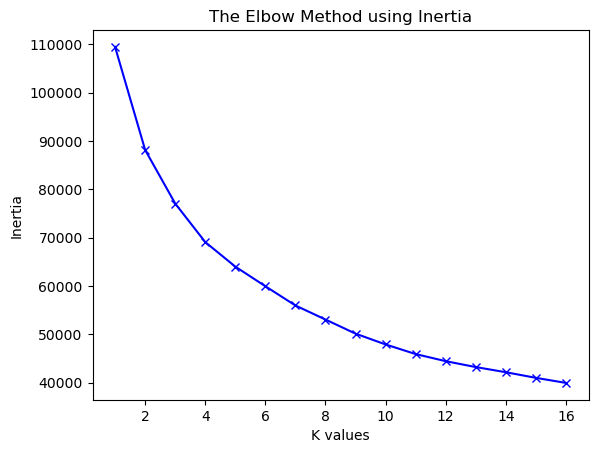

In [23]:
# find 'k' value by Elbow Method

inertia = []
range_val = range(1,17)
for i in range_val:
  kmean = KMeans(n_clusters=i)
  kmean.fit_predict(pd.DataFrame(credit_scaled_df))
  inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('K values') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

From this plot, 4th cluster seems to be the elbow of the curve.
However, the values does not reduce to linearly until 8th cluster, so we may consider using 8 clusters in this case.

# **9. Model Building**

## ** K-Means Clustering**

In [24]:
# apply kmeans algorithm

kmeans_model=KMeans(4)
kmeans_model.fit_predict(credit_scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


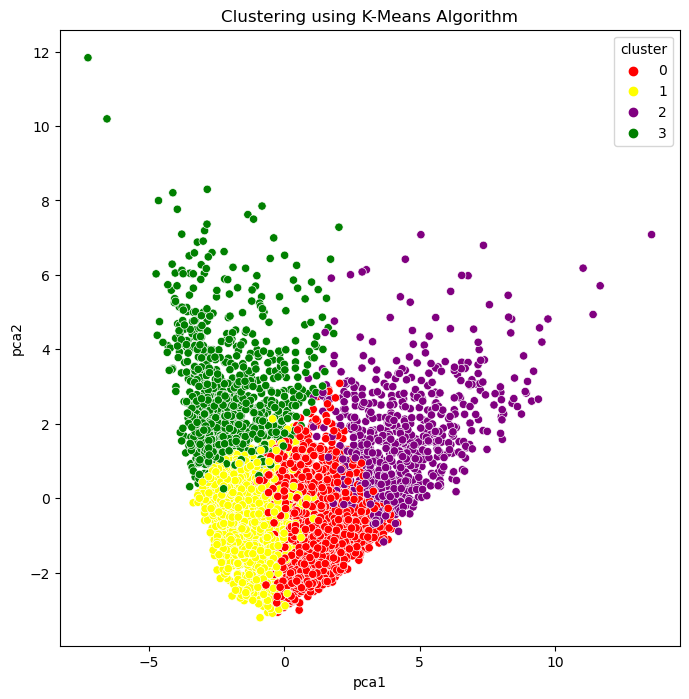

In [25]:
# visualize the clustered dataframe
# Scatter Plot

plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_kmeans,palette=['red','yellow','purple','green'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

## **9.1. Analyzing Clustering Output**

We've used K-Means model for clustering in this dataset.

In [26]:
kmeans_model.cluster_centers_.shape

(4, 17)

In [27]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[credit_df.columns])

# inverse transfor the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[credit_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,819.209064,0.940733,969.330975,361.762808,607.849650,181.154272,0.855676,0.242743,0.693156,0.038863,0.699337,19.171402,4076.240650,1116.847085,607.215979,0.273199,11.751420
1,1236.025775,0.879778,276.640850,229.008614,47.797661,581.788669,0.165559,0.099509,0.064610,0.120958,2.149962,3.009871,3227.081751,962.186847,618.346380,0.053671,11.575171
2,1718.649634,0.976884,3669.272688,2412.342437,1257.834150,322.024314,0.925381,0.694097,0.699331,0.052797,1.143454,52.708914,6335.724234,3122.753623,722.819892,0.278185,11.881616
3,3174.155415,0.959563,338.203012,224.391250,113.847336,3416.383331,0.242878,0.119015,0.141986,0.467419,12.739754,5.442623,5568.596311,2071.291414,1423.737336,0.030535,11.191598


In [28]:
# create a column as "cluster" & store the respective cluster name that they belongs to

credit_cluster_df = pd.concat([credit_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
credit_cluster_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0.0


## **9.2 Outcome**

-> There are 4 clusters (segments)- each clusters are shown below in detail:
* First Customers cluster (Transactors): Those are customers who pay least amount of interest charges and careful with their money, Cluster with lowest balance (104 Dollar) and cash advance (303 Dollar), Percentage of full payment = 23%

* Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance (5000 Dollar) and cash advance (5000 Dollar), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)

* Third customer cluster (VIP/Prime): high credit limit 16K Dollar and highest percentage of full payment, target for increase credit limit and increase spending habits

* Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 

## **9.3. Analysis of each Cluster**

### Cluster - 1

In [29]:
cluster_1_df = credit_cluster_df[credit_cluster_df["cluster"]==0]
cluster_1_df.sort_values(by=['BALANCE'], ascending=False).head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
5488,16304.88925,1.0,1770.57,0.00,1770.57,7424.094447,0.5,0.000000,0.416667,0.666667,13,9,19000.0,5337.961195,8345.641905,0.0,12,0.0
5281,16115.59640,1.0,684.74,105.30,579.44,4354.002428,1.0,0.083333,1.000000,0.583333,15,15,18000.0,3546.061550,5743.736444,0.0,12,0.0
585,15244.74865,1.0,7823.74,7564.81,258.93,2621.049473,1.0,1.000000,1.000000,0.083333,2,62,19000.0,11123.409180,4467.520244,0.0,12,0.0
4708,15155.53286,1.0,717.24,717.24,0.00,4718.274895,1.0,1.000000,0.000000,0.500000,7,24,18000.0,4002.194556,3843.924668,0.0,12,0.0
643,14411.95798,1.0,5958.17,3161.46,2796.71,0.000000,1.0,0.583333,1.000000,0.000000,0,98,15000.0,7839.750264,8096.795020,0.0,12,0.0


### Cluster - 2

In [30]:
cluster_2_df = credit_cluster_df[credit_cluster_df["cluster"]==1]
cluster_2_df.sort_values(by=['BALANCE'], ascending=False).head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4140,18495.55855,1.0,5288.28,3657.3,1630.98,0.000000,1.000000,0.583333,1.000000,0.000000,0,76,22000.0,4246.168346,4227.081580,0.0,12,1.0
2361,15532.33972,1.0,1168.75,0.0,1168.75,3183.037625,0.916667,0.000000,0.916667,0.250000,5,11,16500.0,3906.738592,3379.593046,0.0,12,1.0
520,15258.22590,1.0,529.30,529.3,0.00,4100.891579,0.500000,0.500000,0.000000,1.000000,23,10,19000.0,2051.146470,3905.740148,0.0,8,1.0
883,14581.45914,1.0,0.00,0.0,0.00,22665.778500,0.000000,0.000000,0.000000,0.833333,30,0,18500.0,20941.325510,5433.759888,0.0,12,1.0
124,14224.11541,1.0,0.00,0.0,0.00,4614.427403,0.000000,0.000000,0.000000,0.333333,9,0,19000.0,3066.614272,3406.258999,0.0,12,1.0


### Cluster - 3 (Silver)

In [31]:
cluster_3_df = credit_cluster_df[credit_cluster_df["cluster"]==2]
cluster_3_df.sort_values(by=['BALANCE'], ascending=False).head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
138,19043.13856,1.0,22009.92,9449.07,12560.85,0.000000,1.00,0.750000,1.000000,0.000000,0,216,18000.0,23018.575830,18621.013310,0.0,12,2.0
1012,12373.33348,1.0,830.15,200.00,630.15,10249.921000,0.75,0.166667,0.583333,0.916667,26,14,11000.0,14040.866350,12245.926010,0.0,12,2.0
174,11972.01104,1.0,5715.00,4685.54,1029.46,1626.351366,1.00,1.000000,1.000000,0.166667,3,90,14000.0,4639.513745,3192.306018,0.0,12,2.0
1920,11955.30817,1.0,0.00,0.00,0.00,2108.302563,0.00,0.000000,0.000000,0.666667,22,0,13000.0,3933.355350,5601.587776,0.0,12,2.0
3181,11631.32337,1.0,14686.10,0.00,14686.10,3422.724703,1.00,0.000000,1.000000,0.083333,2,347,13600.0,11400.601300,10285.134120,0.0,12,2.0


### Cluster - 4

In [32]:
cluster_4_df = credit_cluster_df[credit_cluster_df["cluster"] == 3]
cluster_4_df.sort_values(by=['BALANCE'], ascending=False).head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
723,13774.74154,1.0,404.24,0.00,404.24,3369.474535,0.250000,0.000000,0.250000,0.500000,7,3,14500.0,3167.870886,3533.464800,0.000000,12,3.0
501,13479.28821,1.0,41050.40,40624.06,426.34,0.000000,0.833333,0.666667,0.416667,0.000000,0,157,17000.0,36066.750680,15914.484620,0.083333,12,3.0
2403,11964.83264,1.0,1175.35,1031.85,143.50,2271.555171,0.750000,0.583333,0.416667,0.583333,11,19,14000.0,2949.673416,3098.625050,0.000000,12,3.0
128,11167.23403,1.0,150.64,150.64,0.00,8362.154254,0.083333,0.083333,0.000000,0.500000,14,1,17000.0,2606.059389,2894.077159,0.000000,12,3.0
2159,10905.05381,1.0,431.93,133.50,298.43,47137.211760,0.583333,0.250000,0.500000,1.000000,123,21,19600.0,39048.597620,5394.173671,0.000000,12,3.0


## Optional

# **10. Save The Model**

In [33]:
#Saving Scikitlearn models

import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [34]:
# save the dataframe in .csv file named as "Clustered_Costumer_Data"

credit_cluster_df.to_csv("Clustered_Customer_Data.csv")